## Nischal Pradyoth 
## CS20B1109

## Data Science Assignment

### Questions: 
Q1: How many rows and columns are there in books.csv dataset?

Q2: How many books do not have an original title?

Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [3]:
## Q1: How many rows and columns are there in books.csv dataset?
df = pd.read_csv("books.csv")
print("Number of rows: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows:  399
Number of columns are:  24


In [4]:
## Q2: How many books do not have an original title?
print("Number of books don't have an original title: ",df['original_title'].isnull().sum())

Number of books don't have an original title:  36


In [5]:
## Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after 
## removing null values in the original_title column.
df_copy=df.copy()
df_copy.dropna(subset=['original_title'],inplace=True)
print("Number of unique books are: ",len(df_copy['book_id'].unique()))


Number of unique books are:  363


In [6]:
## Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?
print("Average rating of all books based on 'average rating' is: ",df['average_rating'].mean())

Average rating of all books based on 'average rating' is:  3.9837844611528817


In [7]:
## Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.
print("Number of books published in the year '2000' are: ",len(df[df['original_publication_year']==2000]))

Number of books published in the year '2000' are:  8


In [8]:
## Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.
print("Title of the book with maximum rating is: ",df['title'][df['work_ratings_count'].idxmax()])

Title of the book with maximum rating is:  The Diary of a Young Girl


In [ ]:
count=df[df['average_rating']>=3.5 & df['average_rating']<4]

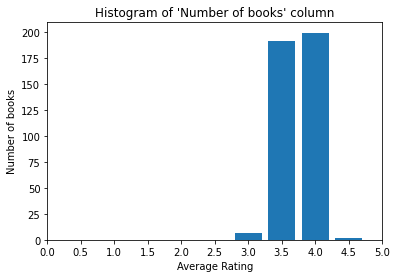

In [45]:
## Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] 
## with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). 
## Plot bar graph to show total number of books in each rating bucket.

def custom_round(number):
    if number % 1 < 0.5:
        return int(number)
    elif number % 1 >= 0.5 and number % 1 <1:
        return int(number) + 0.5
    
df['rounded']=df['average_rating'].apply(custom_round)
List=df['rounded'].value_counts().sort_index()
plt.bar(List.index,List.values,width=0.4)
plt.xlabel("Average Rating")
plt.ylabel("Number of books")
plt.xticks(np.arange(0,5.5,0.5))
plt.title("Histogram of 'Number of books' column")
plt.show()